In [22]:
from google.colab import files
uploaded = files.upload()


Saving dataset.csv to dataset (1).csv


In [23]:
import pandas as pd

data = pd.read_csv('dataset.csv')

print("## Data Sample")
print(data.head())


## Data Sample
   No    Pelatih Kandang Sendiri Latihan Stamina  Mental Menang
0   1  Pengetian              Ya   Rutin    Kuat      PD     Ya
1   2  Pengetian              Ya   Rutin    Kuat  Gerogi  Tidak
2   3  Pengetian           Tidak  Jarang   Lemah  Gerogi  Tidak
3   4    Menekan              Ya   Rutin    Kuat      PD     Ya
4   5    Menekan           Tidak   Rutin   Lemah  Gerogi  Tidak


In [24]:
print("\n### Informasi Data")
print(data.info())

print("\n### Statistik Deskriptif")
print(data.describe(include='all'))



### Informasi Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   No               60 non-null     int64 
 1   Pelatih          60 non-null     object
 2   Kandang Sendiri  60 non-null     object
 3   Latihan          60 non-null     object
 4   Stamina          60 non-null     object
 5   Mental           60 non-null     object
 6   Menang           60 non-null     object
dtypes: int64(1), object(6)
memory usage: 3.4+ KB
None

### Statistik Deskriptif
               No    Pelatih Kandang Sendiri Latihan Stamina Mental Menang
count   60.000000         60              60      60      60     60     60
unique        NaN          2               2       3       2      2      2
top           NaN  Pengetian              Ya   Rutin   Lemah     PD     Ya
freq          NaN         37              39      45      35     38     35
mean    30.500000

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

if 'No' in data.columns:
    data = data.drop('No', axis=1)

le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

X = data.drop('Menang', axis=1)
y = data['Menang']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data berhasil dipersiapkan.")


Data berhasil dipersiapkan.


In [26]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Model berhasil dibuat dan digunakan untuk prediksi.")


Model berhasil dibuat dan digunakan untuk prediksi.


### Akurasi Model: 100.00%

### Laporan Klasifikasi
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         9

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



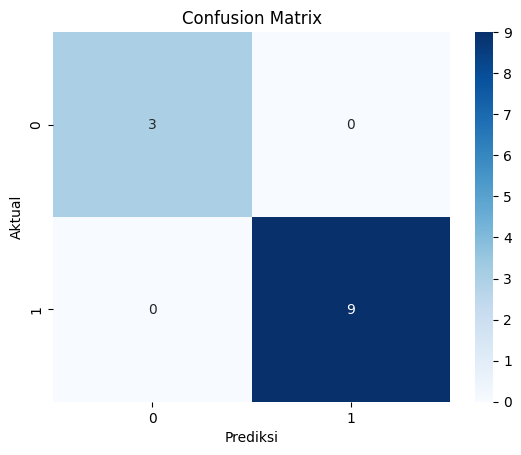

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
print(f"### Akurasi Model: {accuracy * 100:.2f}%")

print("\n### Laporan Klasifikasi")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()


In [28]:
print("\n### Label yang Dikenali")
for col in data.columns:
    if col != 'Menang':
        print(f"{col}: {le.classes_}")



### Label yang Dikenali
Pelatih: ['Tidak' 'Ya']
Kandang Sendiri: ['Tidak' 'Ya']
Latihan: ['Tidak' 'Ya']
Stamina: ['Tidak' 'Ya']
Mental: ['Tidak' 'Ya']


In [30]:
new_data = {
    'Pelatih': input("Punya Tim Pelatih?: "),
    'Kandang Sendiri': input("Kandang Sendiri: "),
    'Latihan': input("Latihan (Rutin (Ya)/Jarang (Tidak)): "),
    'Stamina': input("Stamina (Kuat(Ya)/Lemah(Tidak)): "),
    'Mental': input("Mental (PD(Ya)/Gerogi(Tidak)): ")
}

new_data_df = pd.DataFrame([new_data])

for col in new_data_df.columns:
    if new_data_df[col][0] not in le.classes_:
        print(f"Error: Label '{new_data_df[col][0]}' tidak ditemukan dalam data pelatihan.")
        print(f"Label yang valid untuk kolom {col}: {le.classes_}")
        break
    else:
        new_data_df[col] = le.transform(new_data_df[col])

if not new_data_df.isnull().values.any():
    prediction = model.predict(new_data_df)
    result = 'Menang' if prediction[0] == 1 else 'Tidak Menang'
    print(f"Prediksi: {result}")


Punya Tim Pelatih?: Ya
Kandang Sendiri: Tidak
Latihan (Rutin (Ya)/Jarang (Tidak)): Ya
Stamina (Kuat(Ya)/Lemah(Tidak)): Ya
Mental (PD(Ya)/Gerogi(Tidak)): Ya
Prediksi: Menang
